Hola,Sarah!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

# PROYECTO FINAL
## PARTE 3. ENTREGA DEL PROYECTO
### Telecomunicaciones: identificar operadores ineficaces
#### Elaborado por: Sarah Moscoso

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

### 1- Notebook con mi código (.ipynb)
#### Análisis exploratorio de datos

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as st
from scipy.stats import levene

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

In [2]:
# Descargar archivos
telecom = pd.read_csv('/datasets/telecom_dataset_us.csv')
clients = pd.read_csv('/datasets/telecom_clients_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
# Borrar las filas donde no tenga operador_id o internal, ya que no nos va a servir en el análisis
telecom = telecom.dropna()

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45670 non-null  int64  
 1   date                 45670 non-null  object 
 2   direction            45670 non-null  object 
 3   internal             45670 non-null  object 
 4   operator_id          45670 non-null  float64
 5   is_missed_call       45670 non-null  bool   
 6   calls_count          45670 non-null  int64  
 7   call_duration        45670 non-null  int64  
 8   total_call_duration  45670 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.2+ MB


In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


### Identificar operadores ineficaces
- tiene una gran cantidad de llamadas entrantes perdidas (internas y externas).
- tiene un tiempo de espera prolongado para las llamadas entrantes.
- Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

In [6]:
# operadores únicos
telecom['operator_id'].nunique()

1092

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de valores nulos, como aprendiste en cursos anteriores esto es muy importante a la hora de realizar análisis de datos

Además lo complementas con el análisis de registros únicos

In [7]:
# El número de llamadas abandonadas por operador
missed = telecom.groupby('operator_id',as_index= False)['is_missed_call'].count().sort_values(by='is_missed_call',ascending = False)
print(missed.describe())
print()
print("Número de llamadas perdidas que se consideran ya como negativas:")
print(missed['is_missed_call'].quantile(0.99).round())
print()
# Tomé a los operadores más críticos si tuvieron un mayor de 255 llamadas perdidas
worse_missed_calls = missed[missed['is_missed_call'] > 255]
print(worse_missed_calls)

         operator_id  is_missed_call
count    1092.000000     1092.000000
mean   925517.543956       41.822344
std     22854.532209       54.013981
min    879896.000000        1.000000
25%    906393.500000        6.000000
50%    925105.000000       21.000000
75%    944211.500000       54.000000
max    973286.000000      348.000000

Número de llamadas perdidas que se consideran ya como negativas:
255.0

     operator_id  is_missed_call
204     901884.0             348
203     901880.0             335
108     893804.0             325
28      885876.0             319
78      891410.0             290
33      887276.0             289
29      885890.0             277
79      891414.0             277
254     905538.0             269
48      889410.0             262
191     900892.0             261


In [8]:
worse_missed_op = worse_missed_calls['operator_id']
worse_op = telecom[telecom['operator_id'].isin(worse_missed_op)]
print(worse_op)
print("Operadores únicos que tengan demasiadas llamadas perdidas:")
print(worse_op['operator_id'].nunique())

       user_id                       date direction internal  operator_id  \
2894    166485  2019-08-22 00:00:00+03:00       out    False     887276.0   
2896    166485  2019-08-22 00:00:00+03:00       out    False     887276.0   
2900    166485  2019-08-23 00:00:00+03:00       out    False     887276.0   
2901    166485  2019-08-23 00:00:00+03:00       out    False     887276.0   
2903    166485  2019-08-26 00:00:00+03:00       out    False     887276.0   
...        ...                        ...       ...      ...          ...   
26766   167150  2019-11-28 00:00:00+03:00       out    False     905538.0   
26776   167150  2019-11-28 00:00:00+03:00        in    False     905538.0   
26778   167150  2019-11-28 00:00:00+03:00       out     True     905538.0   
26779   167150  2019-11-28 00:00:00+03:00       out     True     905538.0   
26782   167150  2019-11-28 00:00:00+03:00       out    False     905538.0   

       is_missed_call  calls_count  call_duration  total_call_duration  
28

<AxesSubplot:title={'center':'llamadas perdidas por operador'}, ylabel='Frequency'>

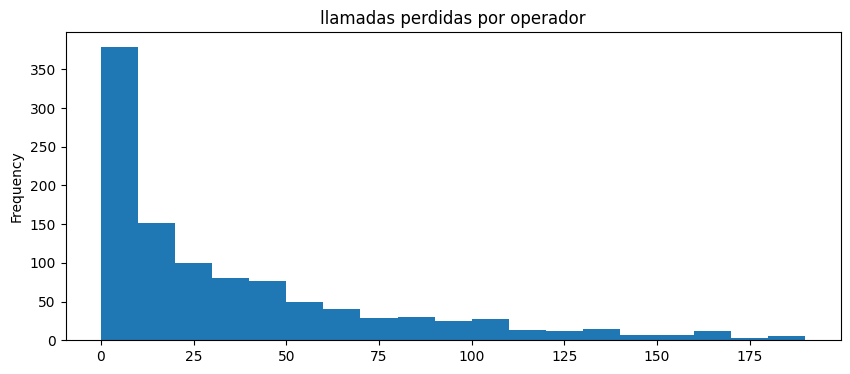

In [9]:
missed['is_missed_call'].plot(kind='hist', title='llamadas perdidas por operador', xlabel="llamadas perdida", ylabel="frecuencia", bins= range(0,200,10), figsize= (10, 4))

In [10]:
# El tiempo de espera prolongado de las llamadas entrantes
telecom['wait_call'] = telecom['total_call_duration'] - telecom['call_duration']
in_calls = telecom[telecom['direction'] == 'in']

waits_op = in_calls.groupby('operator_id', as_index= False)['wait_call'].mean().sort_values(by= 'wait_call',ascending = False)
print(waits_op)
print(waits_op.describe())
print()
print("Tiempo de espera que se consideran ya como negativas:")
print(waits_op['wait_call'].quantile(0.99).round())

     operator_id    wait_call
337     919794.0  1039.540541
335     919790.0   875.088235
206     906070.0   853.312500
445     931458.0   679.584906
328     919204.0   651.125000
..           ...          ...
404     926872.0     1.428571
677     952982.0     1.142857
675     952954.0     1.000000
636     948282.0     1.000000
644     949420.0     1.000000

[754 rows x 2 columns]
         operator_id    wait_call
count     754.000000   754.000000
mean   923704.400531    57.871451
std     22646.733795    95.870050
min    879896.000000     1.000000
25%    905153.000000    17.609091
50%    924580.000000    31.000000
75%    940457.500000    58.930556
max    973286.000000  1039.540541

Tiempo de espera que se consideran ya como negativas:
552.0


<AxesSubplot:title={'center':'Tiempo de espera promedio'}, ylabel='Frequency'>

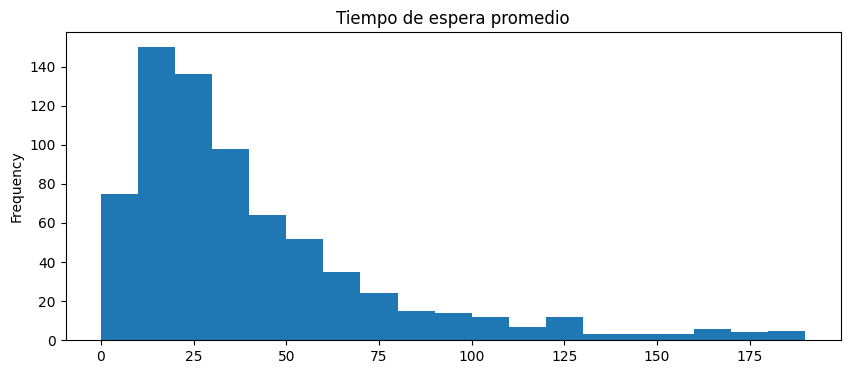

In [11]:
waits_op['wait_call'].plot(kind='hist', title='Tiempo de espera promedio', bins= range(0,200,10) , figsize= (10, 4))
#plt.xlabel('Tiempo de espera (segundos)', fontsize=12)
#plt.ylabel('Frecuencia', fontsize=12)

In [12]:
worse_op_in_calls = in_calls[in_calls['wait_call'] > 552]
print("Operadores únicos que tengan un tiempo de espera promedio prolongado en llamadas entrantes:")
worse_op_in_calls['operator_id'].nunique()

Operadores únicos que tengan un tiempo de espera promedio prolongado en llamadas entrantes:


45

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra iteración)</b> <a class="tocSkip"></a><br>

Gran trabajo con el análisis de todos las variables que posteriormente nos va a servir para la clasificación del tipo de operadores    

In [13]:
# Número reducido de llamadas salientes por operador = operador ineficiente
out_calls = telecom[telecom['direction'] == 'out']
out_calls = out_calls.groupby('operator_id', as_index = False)['direction'].count().sort_values(by = 'direction', ascending = True)
print(out_calls)
out_calls.describe()
print()
print("Número reducido de llamadas salientes que se consideran ya como negativas:")

print(out_calls['direction'].quantile(0.99).round())

     operator_id  direction
791     955068.0          1
250     907998.0          1
486     930816.0          1
814     958458.0          1
495     932246.0          1
..           ...        ...
68      891414.0        212
27      887276.0        215
24      885876.0        216
163     901880.0        216
164     901884.0        246

[882 rows x 2 columns]

Número reducido de llamadas salientes que se consideran ya como negativas:
186.0


<AxesSubplot:title={'center':'**Número de llamadas** salientes por operador'}, ylabel='Frequency'>

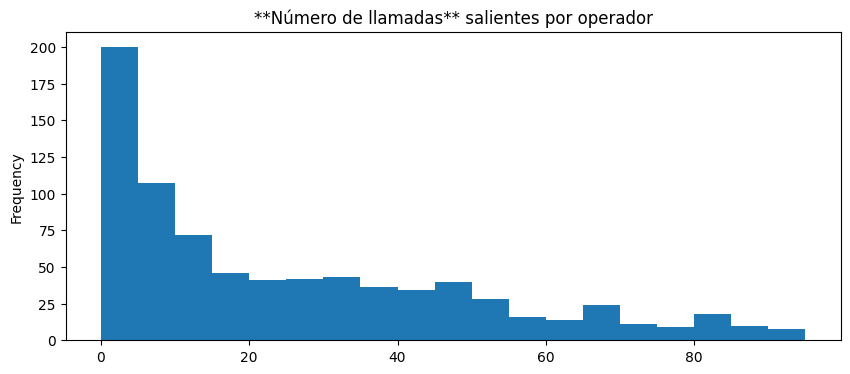

In [14]:
out_calls['direction'].plot(kind='hist', title='**Número de llamadas** salientes por operador', bins= range(0,100,5) , figsize= (10, 4))

In [15]:
worse_op_out_calls = out_calls[out_calls['direction'] > 186]
print("Operadores únicos que tengan un número reducido de llamadas salientes:")
worse_op_out_calls['operator_id'].nunique()

Operadores únicos que tengan un número reducido de llamadas salientes:


9

In [16]:
# Obtener operadores únicos de los 3 datasets
all_operators = pd.concat([
    worse_op['operator_id'],
    worse_op_in_calls['operator_id'],
    worse_op_out_calls['operator_id']
]).unique()

print(f"Total de operadores únicos en todos los datasets: {len(all_operators)}")
all_operators

Total de operadores únicos en todos los datasets: 57


array([887276., 891410., 891414., 885890., 885876., 900892., 889410.,
       893804., 901884., 901880., 905538., 882686., 882690., 902532.,
       906680., 908958., 893402., 899082., 906404., 906406., 906408.,
       906410., 954750., 923526., 913938., 913942., 906070., 906076.,
       911310., 919554., 919552., 921818., 919792., 919794., 919790.,
       944228., 944210., 919206., 919166., 919204., 919164., 921318.,
       931458., 921306., 969272., 944226., 951508., 939762., 958460.,
       939370., 938414., 948286., 940634., 940630., 940588., 954650.,
       879898.])

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra iteración)</b> <a class="tocSkip"></a><br>
Gran trabajo con la identificación  si un operador es eficiente o no. Esto es clave en este tipo de análisis, porque evita dudas sobre cómo se llega a la conclusión y facilita su réplica.


</div>

### Pruebas estadísticas para comparar los operadores eficientes y los ineficientes
**Hipótesis sobre la igualdad de las medias de 2 poblaciones**

In [17]:
# Dataset de los operadores ineficientes
op_ineficientes = telecom[telecom['operator_id'].isin(all_operators)]
#print(op_ineficientes.info())

In [18]:
# Dataset de los operadores eficientes
op_eficientes = telecom[~telecom['operator_id'].isin(all_operators)]
#op_eficientes.info()

Se encuentran 7886 filas en el dataframe de operadores ineficientes.
- Recordemos que existen 57 operadores ineficientes únicos

Por otro lado existen 37,784 filas en el dataframe de operadores eficientes.
- Los operadores únicos son: 1035

La suma de las filas de los 2 dataframes dan en total 45,670 filas del dataframe completo que es 'telecom'

### Prueba las hipótesis estadísticas
- 1er Hipótesis: El grupo A tiene una media menor de llamadas entrantes perdidas que el grupo B.
- 2da Hipótesis: El grupo A tiene una media menor de tiempo de espera en llamadas entrantes que el grupo B.
- 3ra Hipótesis: El grupo A tiene una media mayor de número de llamadas salientes que el grupo B.

**1er Hipotesis**

Se necesitan 2 samples, en este caso las llamadas entrantes perdidas de las poblaciones.

Hipótesis nula: El grupo A tiene una media menor de llamadas entrantes perdidas que el grupo B.

Hipótesis alternativa: El grupo A tiene una media igual o mayor de llamadas entrantes perdidas que el grupo B.

In [19]:
#LLAMADAS ENTRANTES PERDIDAS AAA
in_lost_calls_A = op_eficientes[op_eficientes['direction'] == 'in']
in_lost_calls_A = in_lost_calls_A.groupby('operator_id', as_index= False)['is_missed_call'].sum()
llamadas_perdidas_A = in_lost_calls_A['is_missed_call']

In [20]:
#LLAMADAS ENTRANTES PERDIDAS BBB
in_lost_calls_B = op_ineficientes[op_ineficientes['direction'] == 'in']
in_lost_calls_B = in_lost_calls_B.groupby('operator_id', as_index= False)['is_missed_call'].sum()
llamadas_perdidas_B = in_lost_calls_B['is_missed_call']

In [21]:
#Samples
sample_A = llamadas_perdidas_A
sample_B = llamadas_perdidas_B
alpha = 0.05

In [22]:
#Prueba de Levene para ver si las varianzas son iguales
prueba_levene= levene(sample_A, sample_B)
print(prueba_levene)
# El pvalue es menor a 0.05, por lo que las varianzas son diferentes

LeveneResult(statistic=142.63209672651968, pvalue=3.1550054951392454e-30)


In [23]:
#results
#p_unacola = results.pvalue / 2 if results[0] < 0 else 1 - (results.pvalue / 2)

In [24]:
results = st.ttest_ind(sample_A, sample_B, equal_var = False)

p_unacola = results.pvalue / 2 if results[0] < 0 else 1 - (results.pvalue / 2)

print('valor p:', results.pvalue)
#if pvalue < alpha:

if p_unacola < alpha:
    print('Rechazamos la H0')
else:
    print('No podemos rechazar la H0')

valor p: 1.8666187070302227e-07
Rechazamos la H0


**2da Hipotesis**

Se necesitan 2 samples, en este caso el tiempo de espera en llamadas entrantes de las poblaciones.

Hipótesis nula: El grupo A tiene una media menor de tiempo de espera en llamadas entrantes que el grupo B

Hipótesis alternativa: El grupo A tiene una media mayor o igual de tiempo de espera en llamadas entrantes que el grupo B.

In [25]:
#LLAMADAS ENTRANTES- TIEMPO DE ESPERA AAA
in_time_calls_A = op_eficientes[op_eficientes['direction'] == 'in']
in_time_calls_A = in_time_calls_A.groupby('operator_id', as_index= False)['wait_call'].mean()
tiempo_de_espera_A = in_time_calls_A['wait_call']

In [26]:
#LLAMADAS ENTRANTES- TIEMPO DE ESPERA BBB
in_time_calls_B = op_ineficientes[op_ineficientes['direction'] == 'in']
in_time_calls_B = in_time_calls_B.groupby('operator_id', as_index= False)['wait_call'].mean()
tiempo_de_espera_B = in_time_calls_B['wait_call']

In [27]:
#Samples
sample_A = tiempo_de_espera_A
sample_B = tiempo_de_espera_B
alpha = 0.05

In [28]:
#Prueba de Levene para ver si las varianzas son iguales
prueba_levene= levene(sample_A, sample_B)
print(prueba_levene)
# El pvalue es menor a 0.05, por lo que las varianzas son distintas

LeveneResult(statistic=320.78794908769333, pvalue=5.118957762719531e-60)


In [29]:
results = st.ttest_ind(sample_A, sample_B, equal_var = False)

p_unacola = results.pvalue / 2 if results[0] < 0 else 1 - (results.pvalue / 2)

print('valor p:', results.pvalue)
#if pvalue < alpha:

if p_unacola < alpha:
    print('Rechazamos la H0')
else:
    print('No podemos rechazar la H0')

valor p: 5.719989604370798e-11
Rechazamos la H0


In [30]:
#results = st.ttest_ind(sample_A, sample_B)
#print('valor p:', results.pvalue)
#if results.pvalue < alpha:
 #   print('Rechazamos la H0')
#else:
 #   print('No podemos rechazar la H0')

**3ra Hipotesis**

Se necesitan 2 samples, en este caso el número de llamadas salientes de las poblaciones.

Hipótesis nula: El grupo A tiene una media mayor de número de llamadas salientes que el grupo B.

Hipótesis alternativa: El grupo A tiene una media menor o igual de número de llamadas salientes que el grupo B.

In [31]:
#LLAMADAS SALIENTES AAA
out_calls_A = op_eficientes[op_eficientes['direction'] == 'out']
out_calls_A =out_calls_A.groupby('operator_id', as_index= False)['calls_count'].sum()
llamadas_salientes_A =out_calls_A['calls_count']

In [32]:
#LLAMADAS SALIENTES BBB
out_calls_B = op_ineficientes[op_ineficientes['direction'] == 'in']
out_calls_B = out_calls_B.groupby('operator_id', as_index= False)['calls_count'].sum()
llamadas_salientes_B = out_calls_B['calls_count']

In [33]:
#Samples
sample_A = llamadas_salientes_A
sample_B = llamadas_salientes_B
alpha = 0.05

In [34]:
#Prueba de Levene para ver si las varianzas son iguales
prueba_levene= levene(sample_A, sample_B)
print(prueba_levene)
# El pvalue es mayor a 0.05, por lo que las varianzas son iguales

LeveneResult(statistic=0.07859066573553926, pvalue=0.7792822731221942)


In [35]:
results = st.ttest_ind(sample_A, sample_B, equal_var = True)

p_unacola = results.pvalue / 2 if results[0] < 0 else 1 - (results.pvalue / 2)

print('valor p:', results.pvalue)
#if pvalue < alpha:

if p_unacola < alpha:
    print('Rechazamos la H0')
else:
    print('No podemos rechazar la H0')

valor p: 0.11459761712114425
No podemos rechazar la H0


### Conclusiones

Gracias al análisis de datos hemos encontrado a los operadores ineficientes que deberían ser removidos para un mayor rendimiento de la compañia.
Se evaluó de acuerdo a los siguientes criterios:

- Tiene una gran cantidad de llamadas entrantes perdidas (internas y externas).
- Tiene un tiempo de espera prolongado para las llamadas entrantes.
- Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

1. En el primer criterio tenemos a 11 operadores.
3. En segundo lugar los operadores que tiene un tiempo de espera promedio prolongado solo en las llamadas entrantes son 45.
5. Finalmente se tiene 9 operadores con un número reducido de llamadas salientes.

En total, los operadores únicos en todos los 3 criterios son 57:

887276., 891410., 891414., 885890., 885876., 900892., 889410., 893804., 901884., 901880., 905538., 882686., 882690., 902532., 906680., 908958., 893402., 899082., 906404., 906406., 906408., 906410., 954750., 923526., 913938., 913942., 906070., 906076., 911310., 919554., 919552., 921818., 919792., 919794., 919790., 944228., 944210., 919206., 919166., 919204., 919164., 921318., 931458., 921306., 969272., 944226., 951508., 939762., 958460., 939370., 938414., 948286., 940634., 940630., 940588., 954650., 879898.

**Conclusiones de las pruebas de hipótesis**
1. No se puede rechazar que el grupo A tiene una media igual o mayor de llamadas entrantes perdidas que el grupo B.
2. No se puede rechazar la hipótesis de que el grupo A tiene una media mayor o igual de tiempo de espera en llamadas entrantes que el grupo B.
3. Se rechaza la hipótesis de que el grupo A tiene una media menor o igual de número de llamadas salientes que el grupo B.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra iteración)</b> <a class="tocSkip"></a><br>
    
Sarah, has realizado un excelente trabajo. Ya solamente para complementar debemos de realizar las pruebas estadisticas para comparar los operadores eficientes y los ineficientes que identificaste 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste. Sigue disfrutando los siguientes cursos!
</div>

### 2- Presentación (.pdf)

Haz una lista de 5 a 10 fuentes (documentación, artículos, etc) que usaste mientras trabajabas en el proyecto. Brinda explicaciones breves sobre las preguntas que cada fuente te ayudó a responder. Prepara una presentación con tus conclusiones. Puedes usar cualquier herramienta que quieras para hacer la presentación, pero debes enviarla en PDF. Coloca el enlace en el cuerpo del proyecto principal.

**Enlace a mi presentación:**
[Presentación - Operadores Ineficaces](https://drive.google.com/file/d/1aZkfBQKrrRu1RhfJrJ9LlNemXR3LA0Pk/view?usp=sharing))